In [1]:
# look at ITL fits files generated by POC. We are looking at QE
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import astropy as ast
import astropy.stats
from astropy.io import fits
import scipy as sc
import scipy.signal
import textwrap
import pylab

# this next magic command makes plots appear within the notebook
%matplotlib inline

# define figure size parameters to make figures larger than default
figwidth=10
figheight=10

In [2]:
# open a FITS file 
hdulist017=fits.open("ITL-3800C-017_QE.fits")

# look at objects that reside within this "list". Note this list is zero-based.
hdulist017.info()


Filename: ITL-3800C-017_QE.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   ()              
1    QE_CURVES   BinTableHDU     63   78R x 18C    [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
2    QE_BANDS    BinTableHDU     62   6R x 18C     [2A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [3]:
# convert header to string and print header information for primary header 
#print "----------extension 0 header-------------" # common to all HDU elements for this image
#print " "
#print textwrap.fill(str(hdulist[0].header),80) # this slightly obscure syntax makes printout 80 columns wide


In [4]:
# print first extension's header
#print "----------extension 1 header-------------" # amplifier-specific header info, mostly pixel placement information
#print "  "
#print textwrap.fill(str(hdulist[1].header),80) 

In [5]:
#print "----------extension 2 header-------------" # amplifier-specific header info, mostly pixel placement information
#print "  "
#print textwrap.fill(str(hdulist[2].header),80) 

In [6]:
qedata=hdulist017[1].data

In [7]:
qecurve=qedata['AMP01']
avg017=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg017)
#for index in range(len(qecurve)):
#  print a[index]

[ 59.39194489  66.03002167  71.16736603  73.99382019  73.8247757
  76.99515533  80.11645508  81.42749023  82.05428314  81.86510468
  82.18251801  81.63618469  81.70106506  81.42103577  81.39767456
  81.56797791  81.66210938  82.18344879  82.62358093  83.41578674
  83.80818176  84.25384521  85.32139587  85.94861603  86.29241943
  87.48681641  88.07559204  89.04412842  89.29019165  90.17047119
  90.27245331  90.68912506  91.3704071   91.60055542  91.99300385
  92.34580994  92.27526855  93.0038681   92.93735504  92.81260681
  92.87911987  92.97025299  93.02445221  93.1295166   93.13852692
  93.00321198  92.64007568  92.80105591  92.52812958  92.30206299
  92.62937164  92.12017059  91.22966003  90.31621552  88.30577087
  87.21026611  84.75067139  82.48745728  79.69897461  76.51145172
  72.43294525  68.27716064  63.47428894  58.03417206  51.49940872
  45.01450348  38.26790619  32.19264221  25.41296196  21.67492676
  15.9273262   11.7262249    8.85676193   8.14454365   7.07416964
   6.066938

In [8]:
#print qecurve[0:100]

In [9]:
wavelength=qedata['WAVELENGTH']
print (wavelength)

[  320.00601196   330.00698853   339.9960022    350.00900269   360.00698853
   369.99200439   379.99798584   389.98999023   400.00299072   410.
   420.01699829   430.01699829   440.           450.00100708   459.98400879
   469.98498535   480.00299072   490.00100708   500.01501465   510.00799561
   520.01599121   530.00201416   540.00201416   550.01397705   560.00402832
   570.00500488   580.01702881   590.00500488   600.00201416   610.00799561
   619.98797607   630.01000977   640.00500488   650.00598145   660.01300049
   669.98999023   680.00598145   689.99102783   700.01300049   710.00299072
   719.99401855   729.98498535   740.01098633   750.           759.98797607
   770.00701904   779.98797607   789.99798584   800.00201416   810.
   819.98999023   830.00402832   840.00897217   850.00299072   869.98797607
   880.00897217   890.01501465   900.00500488   910.01000977   919.99597168
   929.99499512   940.00402832   949.99102783   959.98498535   969.98602295
   979.99102783   989.999023

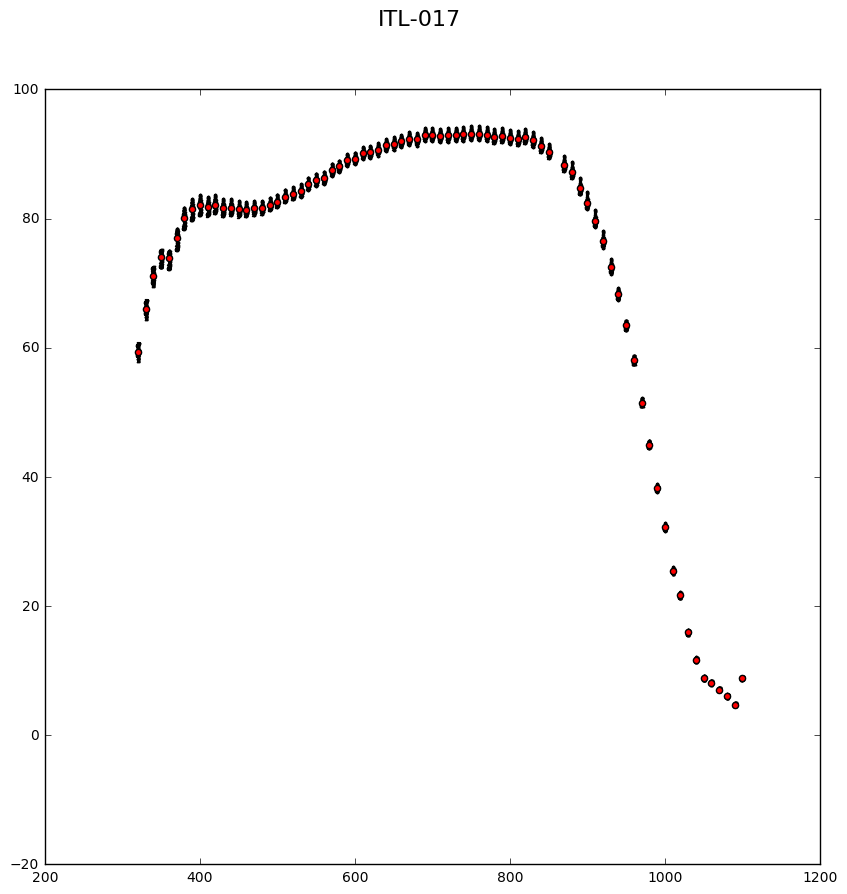

In [10]:
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-017', fontsize=16)

plt.scatter(wavelength, qecurve, 10, 'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg017, 20,'r')

In [11]:
fig1.savefig('ITL-017.pdf')

[ 41.52256393  44.55620956  48.25205231  52.30249405  56.117836
  66.17786407  76.4910965   83.1583786   87.01425934  89.38544464
  91.1326828   91.01209259  91.02391815  90.82431793  89.96353912
  89.44635773  89.17111969  88.39276123  87.75850677  87.25884247
  86.91078186  86.80953217  87.10325623  87.04746246  86.72434998
  87.29447937  87.63969421  87.85123444  88.32607269  88.50718689
  88.74280548  89.15196228  89.50981903  89.97357941  90.41622162
  90.70998383  91.08552551  91.78794098  91.87750244  92.17545319
  92.60503387  93.02324677  93.23045349  93.64349365  93.80290985
  93.74994659  93.93346405  94.49571228  94.27180481  94.55957794
  94.67430878  94.44048309  93.58390808  92.61305237  90.79776764
  89.88868713  87.63019562  84.86528778  81.77394867  78.38288116
  73.62492371  68.88845062  63.26089478  57.36342621  50.75949097
  44.3209343   37.8414917   31.63371468  25.1483345   19.95939255
  15.42694378  11.17934608   8.57412148   7.74830627   6.76379156
   5.6978659

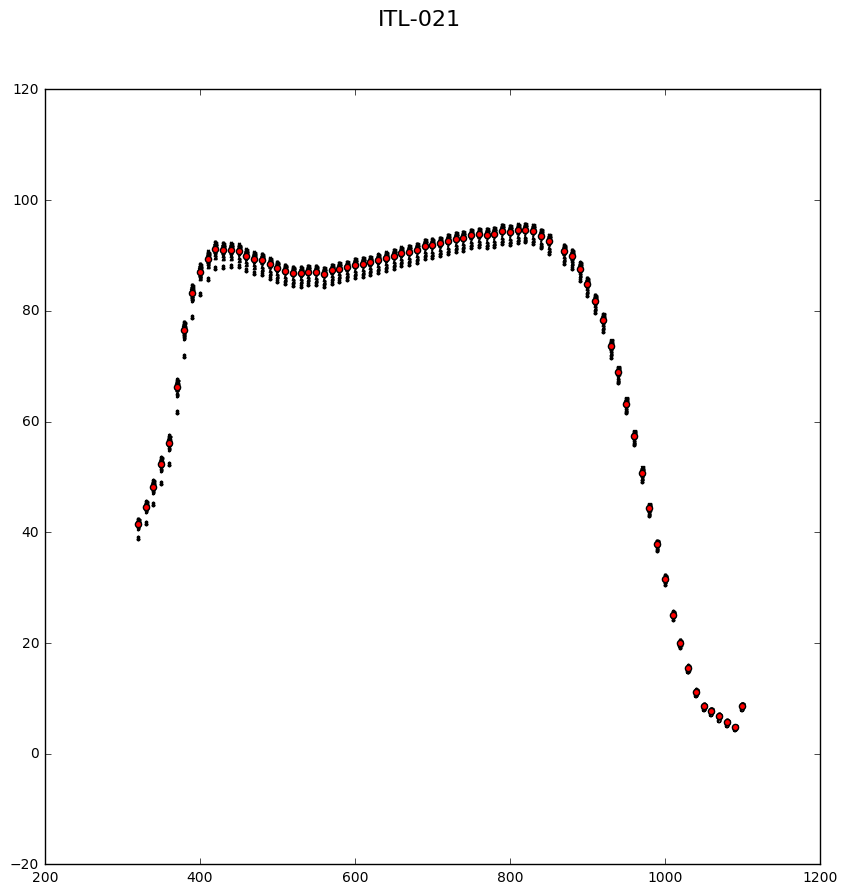

In [12]:
hdulist021=fits.open("ITL-3800C-021_QE.fits")
qedata=hdulist021[1].data
avg021=(qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15'])/14
print (avg021)
print ('AMP01 and AMP016 are bad and are omitted')
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-021', fontsize=16)
#plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg021, 20,'r')
fig1.savefig('ITL-021.pdf')

[ 36.59525681  38.70985794  41.51695251  44.71666718  47.59465027
  57.15399551  67.97475433  75.91659546  81.73082733  85.95723724
  88.25915527  89.32022095  90.11089325  90.55971527  89.8555069
  89.34549713  88.74051666  88.4095993   87.78137207  87.49028015
  86.9565506   87.21923065  86.92406464  86.93165588  86.8710022
  86.88518524  87.23171234  87.65933228  87.74755096  88.21786499
  88.84501648  89.59062195  89.74097443  90.12184906  90.52094269
  91.40487671  91.51963043  92.16503143  93.02809143  93.0643692
  93.47360229  93.80042267  94.1293869   94.4515152   94.71387482
  95.18399048  95.05362701  95.48999023  95.39564514  95.49855804
  95.87568665  95.34386444  94.79127502  93.83900452  91.47862244
  90.36206818  88.12113953  85.63414001  81.90566254  78.42328644
  73.88868713  69.27333069  63.62017822  57.84268951  50.94739151
  44.3240242   37.72736359  31.65562248  25.1050415   18.96834373
  15.71211052  11.38060951   8.62106609   7.86529493   6.8791256
   5.8354969  

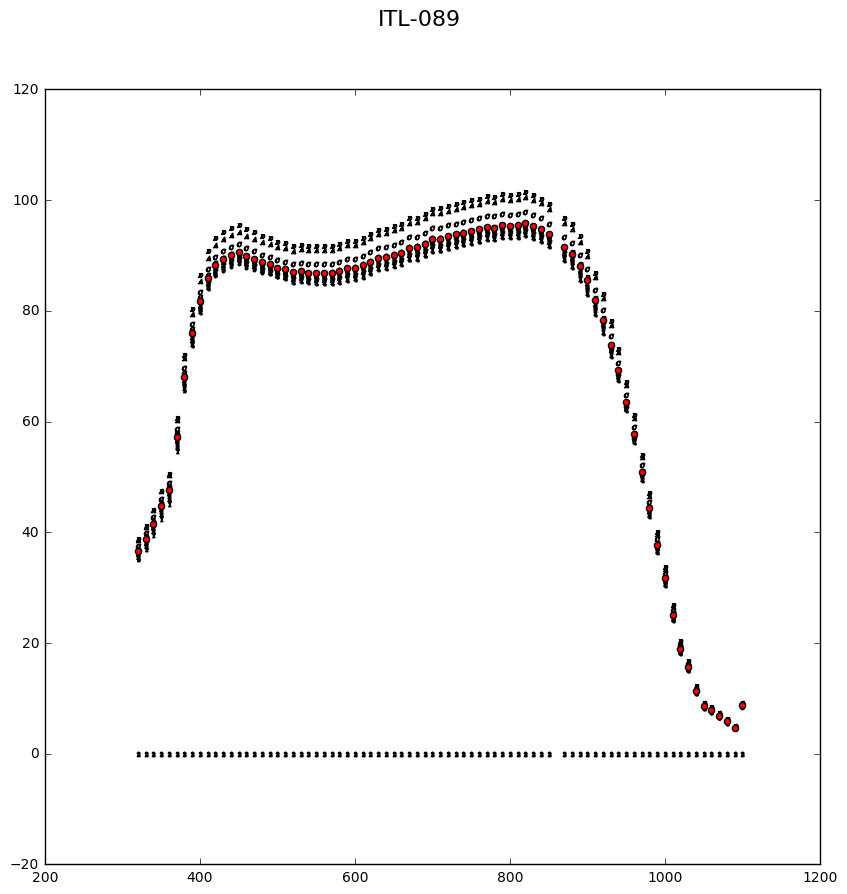

In [13]:
hdulist089=fits.open("ITL-3800C-089-Dev_QE.fits")
qedata=hdulist089[1].data
avg089=(qedata['AMP01']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/15
print (avg089)
print ('AMP02 is bad and is omitted')
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-089', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg089, 20,'r')
fig1.savefig('ITL-089.pdf')

[ 40.32889557  44.01004791  48.09223938  52.18641663  55.90499496
  65.58662415  74.37788391  79.9924469   83.37255859  85.31449127
  86.1927948   86.26136017  85.93756866  85.54447937  84.82136536
  84.90757751  84.06074524  83.75152588  83.68914795  83.50746155
  83.48209381  83.91720581  83.89216614  84.11840057  84.24153137
  85.01879883  85.36328125  85.87698364  86.8142395   86.945961
  87.28573608  88.08878326  88.5017395   88.69163513  89.70932007
  89.68403625  90.13162231  90.83065796  91.06484222  91.80883789
  91.93544769  92.0651474   92.38583374  92.69904327  93.23713684
  92.92191315  93.19208527  93.41170502  93.43373108  93.3112793   93.399086
  93.07656097  92.53084564  91.40631104  89.14884186  87.72612762
  85.08034515  82.77380371  79.19689941  75.69908905  71.45274353
  67.13279724  62.06526184  56.39567566  49.72612381  43.30994415
  36.57301712  30.54174423  24.39251328  19.2468071   15.03743267
  10.885252     8.22544765   7.4822526    6.53124857   5.53094912
 

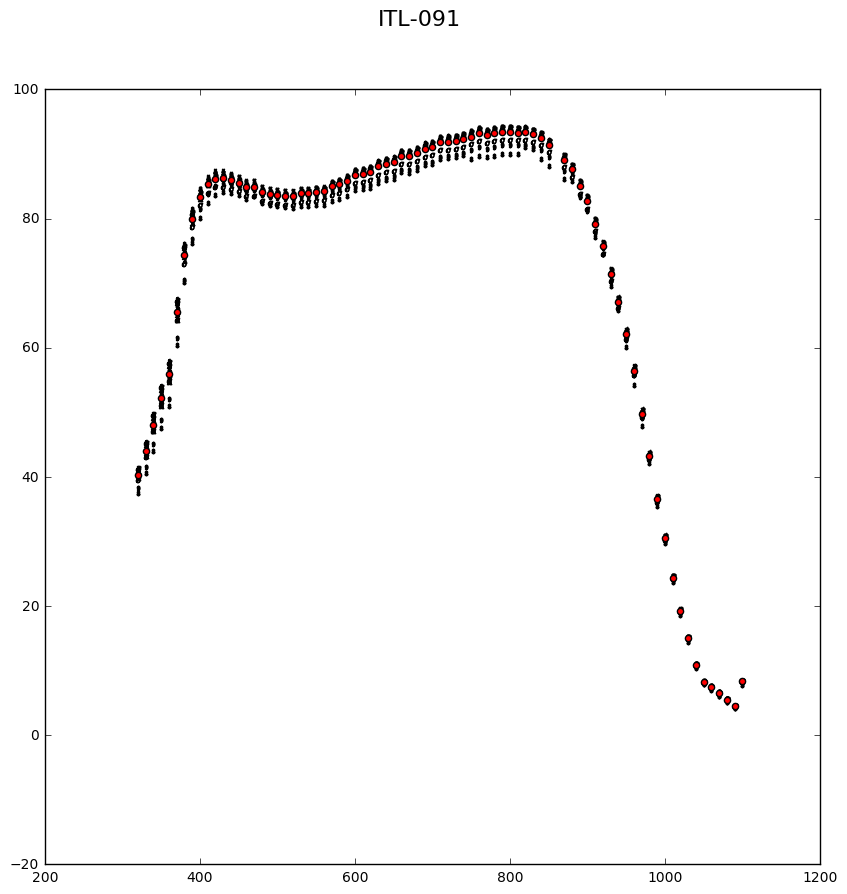

In [14]:
hdulist091=fits.open("ITL-3800C-091_QE.fits")
qedata=hdulist091[1].data
avg091=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg091)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-091', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg091, 20,'r')
fig1.savefig('ITL-091.pdf')

[ 43.28620529  47.65614319  52.6219368   57.67773056  62.44044113
  73.06808472  81.59359741  86.9624939   89.08587646  90.10641479
  90.38891602  89.9618988   88.94863892  87.69507599  86.7358551
  86.04793549  84.96665192  84.70833588  83.86420441  83.674263
  83.47119904  83.26317596  83.38259888  83.55245209  83.78433228
  84.26356506  84.69138336  85.32369995  85.70884705  86.08332825
  86.27539062  86.78421783  87.23006439  87.82066345  88.36368561
  88.53885651  89.19933319  89.55083466  90.19779205  90.09605408
  90.7852478   91.11755371  91.43556213  91.39074707  91.85871887
  91.9668808   91.91038513  92.56921387  92.42255402  92.42427063
  92.35031891  92.55802917  91.88787079  91.05108643  88.91000366
  88.10366058  85.7532196   83.25984955  80.34835815  77.1913147
  73.31241608  68.7808609   63.27517319  57.61190033  50.97675323
  44.55649185  38.0605011   31.87797928  25.3436718   18.94962311
  15.67946529  11.1471529    8.53696728   7.64091301   6.5989933
   5.51212025  

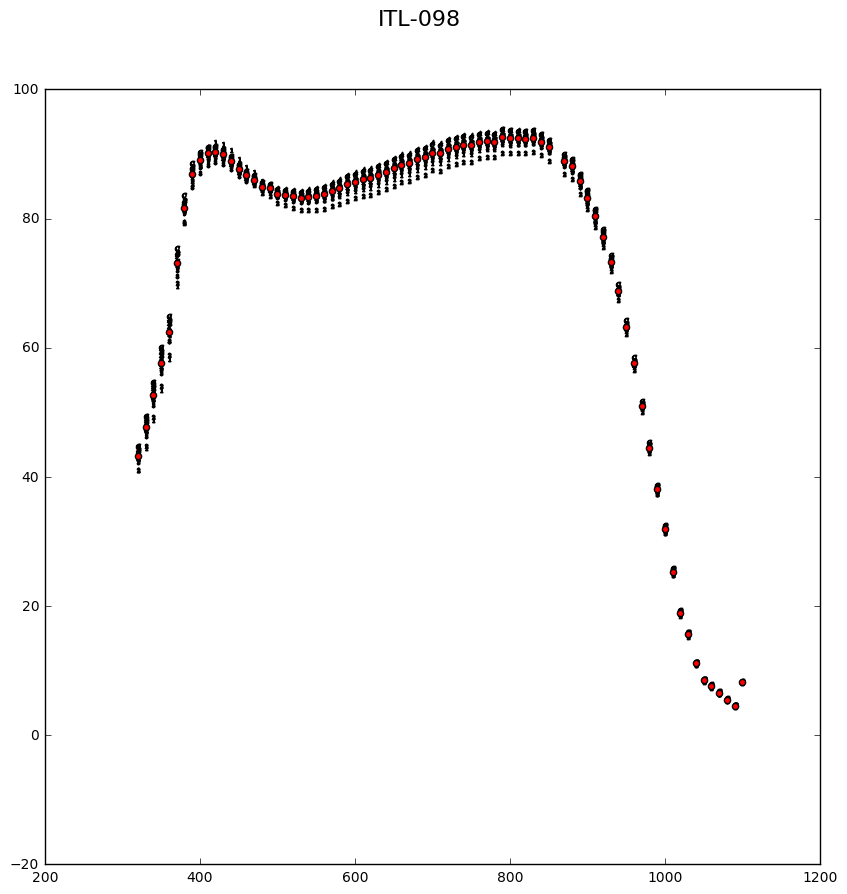

In [15]:
hdulist098=fits.open("ITL-3800C-098-Dev_QE.fits")
qedata=hdulist098[1].data
avg098=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg098)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-098', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg098, 20,'r')
fig1.savefig('ITL-098.pdf')

[ 48.13464355  52.907547    57.4294281   60.97768402  62.96555328
  69.85733032  75.76515198  79.44315338  81.0887146   82.17246246
  82.43363953  82.69690704  82.83638763  82.82198334  82.44934845
  82.60224915  82.33534241  82.8163681   82.93974304  83.41275024
  83.60881042  84.48335266  84.98234558  85.84799957  85.99011993
  87.41898346  87.76421356  88.72588348  89.6145401   90.35676575
  90.79692078  91.55537415  92.37909698  92.83712006  93.54216766
  93.63251495  94.1186676   94.89605713  94.81491852  95.00398254
  95.58963013  95.77323914  95.94816589  96.0536499   96.11995697
  96.16415405  95.74554443  96.25042725  95.60010529  95.52454376
  95.82132721  95.23229218  94.6300354   93.46287537  91.07080078
  89.85124207  87.71645355  84.72884369  81.27171326  77.92134094
  73.64295197  68.87541199  63.40414047  57.97104645  51.29789734
  44.95055008  37.85153198  31.73264313  25.21183395  20.33454514
  14.7116394   10.36701775   9.00798798   6.28142834   7.12739277
   6.06157

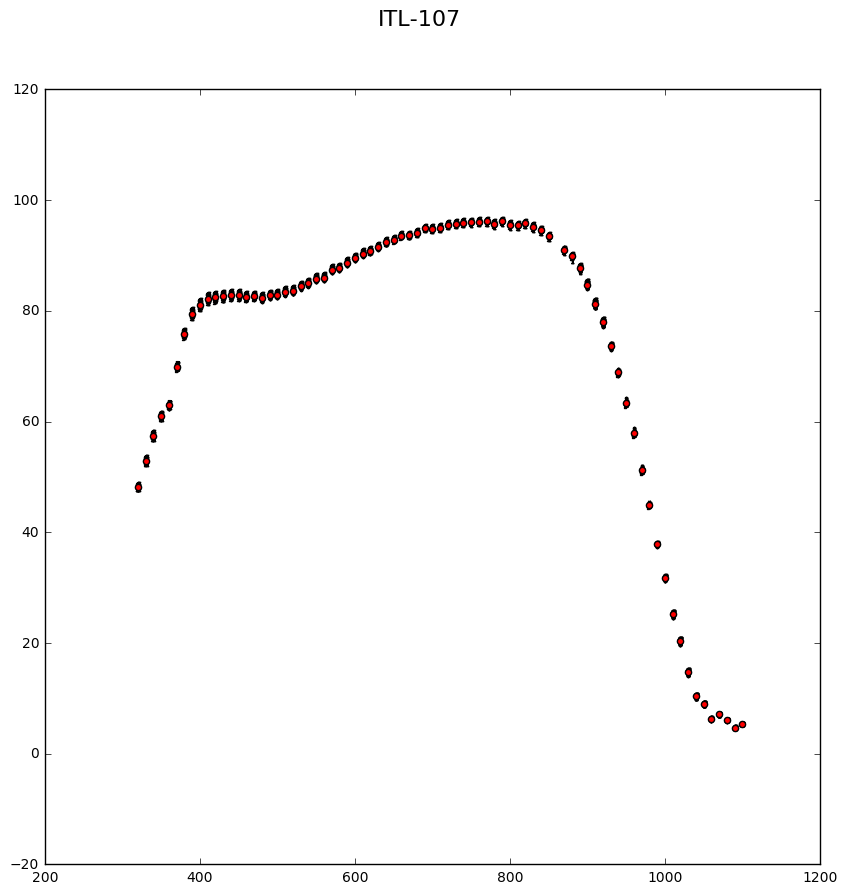

In [16]:
hdulist107=fits.open("ITL-3800C-107_QE.fits")
qedata=hdulist107[1].data
avg107=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg107)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-107', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg107, 20,'r')
fig1.savefig('ITL-107.pdf')

[ 48.66188049  53.8857193   58.76296616  62.88232422  65.20212555
  71.87002563  77.72982025  80.99819183  82.62702942  83.26295471
  83.15550995  82.86035156  82.81581879  82.66374207  82.11717987
  82.48965454  82.10192871  82.21655273  82.86019897  82.89139557
  83.30505371  84.06063843  84.82849121  85.25180817  85.94467926
  86.74558258  87.63877869  88.12739563  88.89059448  89.44287109
  89.92972565  90.48445129  91.22210693  91.43815613  92.07306671
  92.46341705  92.78926849  93.13473511  93.48847198  93.47885895
  93.87947845  93.96470642  94.16954041  94.17938232  94.20664215
  94.38426971  94.34422302  94.18527222  94.00923157  94.08106995
  93.83979034  93.74019623  92.96613312  91.49551392  89.1866684
  88.25010681  85.6878891   83.23013306  79.70248413  76.26191711
  71.91975403  67.4858551   62.0242157   56.50424957  49.70893097
  43.29987335  36.93172073  31.00842857  25.48145676  19.79774857
  15.52841568  11.55884171   8.64039898   7.96736622   7.01114368
   6.039040

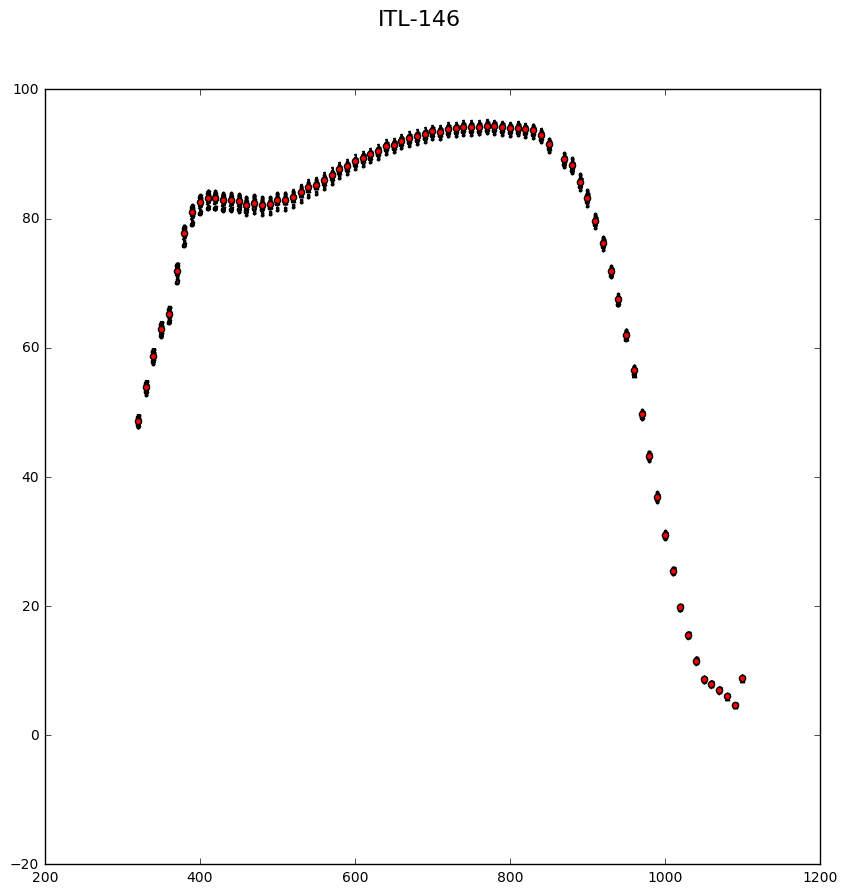

In [17]:
hdulist146=fits.open("ITL-3800C-146_QE.fits")
qedata=hdulist146[1].data
avg146=(qedata['AMP01']+qedata['AMP02']+qedata['AMP03']+qedata['AMP04']+qedata['AMP05']+qedata['AMP06']+qedata['AMP07']+qedata['AMP08']+qedata['AMP09']+qedata['AMP10']+qedata['AMP11']+qedata['AMP12']+qedata['AMP13']+qedata['AMP14']+qedata['AMP15']+qedata['AMP16'])/16
print (avg146)
#print 'AMP02 is bad and is omitted'
wavelength=qedata['WAVELENGTH']
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('ITL-146', fontsize=16)
plt.scatter(wavelength, qedata['AMP01'], 10,'b','$1$')
plt.scatter(wavelength, qedata['AMP02'], 10,'b','$2$')
plt.scatter(wavelength, qedata['AMP03'], 10,'b','$3$')
plt.scatter(wavelength, qedata['AMP04'], 10,'b','$4$')
plt.scatter(wavelength, qedata['AMP05'], 10,'b','$5$')
plt.scatter(wavelength, qedata['AMP06'], 10,'b','$6$')
plt.scatter(wavelength, qedata['AMP07'], 10,'b','$7$')
plt.scatter(wavelength, qedata['AMP08'], 10,'b','$8$')
plt.scatter(wavelength, qedata['AMP09'], 10,'b','$9$')
plt.scatter(wavelength, qedata['AMP10'], 10,'b','$A$')
plt.scatter(wavelength, qedata['AMP11'], 10,'b','$B$')
plt.scatter(wavelength, qedata['AMP12'], 10,'b','$C$')
plt.scatter(wavelength, qedata['AMP13'], 10,'b','$D$')
plt.scatter(wavelength, qedata['AMP14'], 10,'b','$E$')
plt.scatter(wavelength, qedata['AMP15'], 10,'b','$F$')
plt.scatter(wavelength, qedata['AMP16'], 10,'b','$G$')
plt.scatter(wavelength, avg146, 20,'r')
fig1.savefig('ITL-146.pdf')

[ 45.41733932  49.67935944  53.97756195  57.81958771  60.57862091
  68.67272186  76.29267883  81.12839508  83.85337067  85.43772888
  86.24932098  86.24986267  86.19632721  85.9329071   85.33435059
  85.20103455  84.71977234  84.63980865  84.502388    84.52153778
  84.50609589  84.85813904  85.20490265  85.5283432   85.69263458
  86.44477844  86.91495514  87.51551819  88.05601501  88.53205872
  88.8782959   89.4777832   89.99346161  90.35479736  90.94548798
  91.25421906  91.58847809  92.19559479  92.48699951  92.63431549
  93.02107239  93.24494171  93.47477722  93.64961243  93.86824799
  93.91062927  93.8313446   94.17191315  93.95159149  93.95733643
  94.08427429  93.78736877  93.08853912  92.02629852  89.84263611
  88.77031708  86.39141083  83.8542099   80.55686951  77.19875336
  72.89634705  68.38769531  63.01773453  57.38901901  50.70227814
  44.25375748  37.60764694  31.52039528  25.15654564  19.84733963
  15.43190479  11.17777824   8.63753605   7.59001493   6.85512304
   5.82056

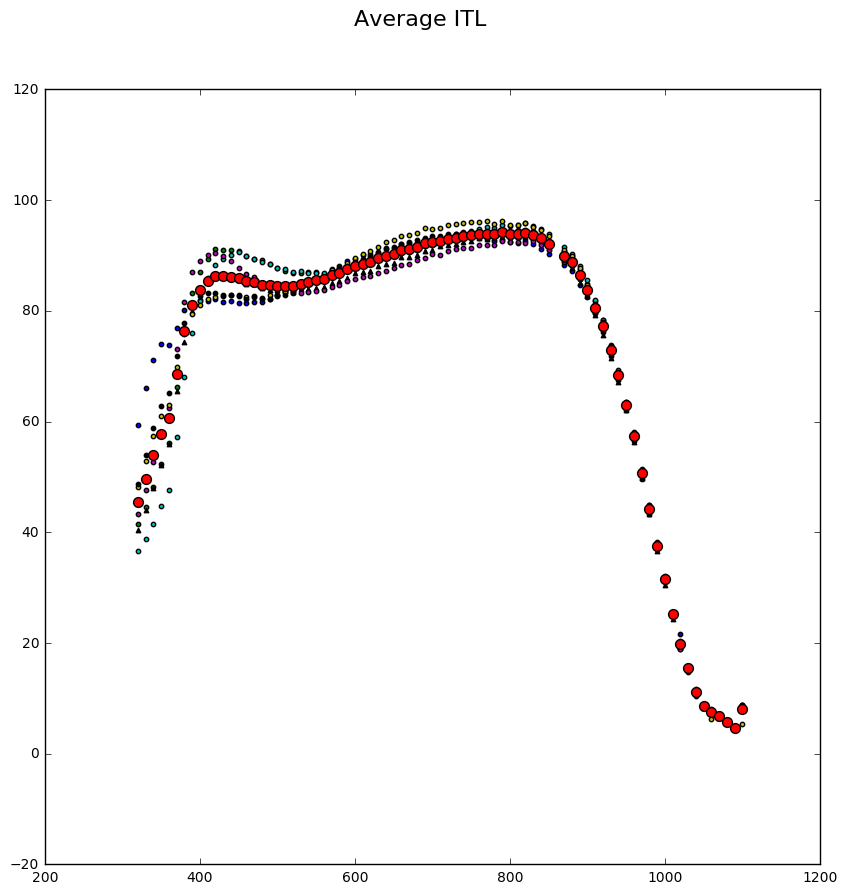

In [19]:
superavg=(avg017+avg021+avg089+avg091+avg098+avg107+avg146)/7
print (superavg)
#for item in superavg:
#print (round(item,1))
for i in range(len(superavg)):
    print (round(wavelength[i],1),round(superavg[i],1))
fig1=plt.figure(1,[figwidth,figheight])
#fig1.ylabel('QE')
fig1.suptitle('Average ITL', fontsize=16)
plt.scatter(wavelength, avg017, 10,'blue')
plt.scatter(wavelength, avg021, 10,'g')
plt.scatter(wavelength, avg089, 10,'c')
plt.scatter(wavelength, avg091, 10,'black','^')
plt.scatter(wavelength, avg098, 10,'m')
plt.scatter(wavelength, avg107, 10,'y')
plt.scatter(wavelength, avg146, 10,'k')
plt.scatter(wavelength, superavg, 50,'r')
fig1.savefig('ITLaverage.pdf')